# Results

## Overview

This is a summary report of the data that was queried from the Smithsonian Open API Access by running the function `create_smithsonian_csv()` with `"baroque"` as a search filter.

In [2]:
from smithsonian_queri import smithsonian_queri

In [54]:
smithsonian_queri.create_smithsonian_csv("baroque", "api_key")

200
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
File finished.


In [23]:
# read data into environment
df = pd.read_csv('baroque_smithsonian_data.csv')

In [24]:
# replace NaN values in data with blank
df = df.replace(np.nan, '', regex = True)

In [25]:
# rename headers
df.columns = ['id', 'title', 'object_type', 'physical_description', 'decade', 'data_source', 'record_link']

#### Glimpse of the data:

In [26]:
df.head(10)

,id,title,object_type,physical_description,decade,data_source,record_link
0,edanmdm-siris_sil_180656,"Baroque architecture and sculpture in Italy, b...","Books, Electronic information resources","xiii, 280 p. illus. 30 cm",1910s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
1,edanmdm-siris_sil_258330,Baroque imagery / John E. Schloder,Exhibitions (events),84 p. : ill. ; 21 x 24 cm,1980s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
2,edanmdm-siris_sil_47719,Five college Roman baroque festival. Easter we...,Exhibitions (events),[56] p. illus. 28cm,1970s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
3,edanmdm-siris_sil_463170,Italian Renaissance & Baroque paintings in Flo...,Exhibitions (events),"v, 75 p. : ill. ; 30 cm",1990s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
4,edanmdm-siris_sil_402558,Eva/Ave : woman in Renaissance and Baroque pri...,Exhibitions (events),238 p. : ill. (some col.) : 28 cm,1990s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
5,edanmdm-siris_sil_194821,"Barokk tervek és vázlatok, 1650-1760 = Baroq...",Exhibitions (events),175 p. : chiefly ill. ; 25 cm,1980s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
6,edanmdm-siris_sil_457068,Silver furniture / by Mogens Bencard ; photos ...,Catalogs,108 p. : ill. ; 27 x 26 cm,1990s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
7,edanmdm-siris_sil_438990,Baroque and Rococo : an exhibition from the co...,Exhibitions (events),2 v. : ill. ; 25 cm,1990s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
8,edanmdm-siris_sil_135741,Scenes and spectacles : the theatre-world of t...,Exhibitions (events),43 p. : ill. ; 22 cm,1960s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
9,edanmdm-siris_sil_652241,Gods & heroes; baroque images of antiquity. A ...,Exhibitions (events),"24, [52] p., 53 p. of illus. 4 col. plates. 27 cm",1960s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...


#### Sources of Data

In [27]:
df['data_source'].explode().value_counts()

National Museum of American History                        104
Smithsonian Libraries                                       58
Cooper Hewitt, Smithsonian Design Museum                    40
Eliot Elisofon Photographic Archives                        37
NMNH - Mineral Sciences Dept.                               25
NMNH - Anthropology Dept.                                   10
Archives of American Art                                     6
Smithsonian Gardens                                          5
Smithsonian Institution Archives                             3
National Museum of African American History and Culture      2
NMNH - Education & Outreach                                  1
National Portrait Gallery                                    1
NMNH - Invertebrate Zoology Dept.                            1
Name: data_source, dtype: int64

<AxesSubplot:ylabel='data_source'>

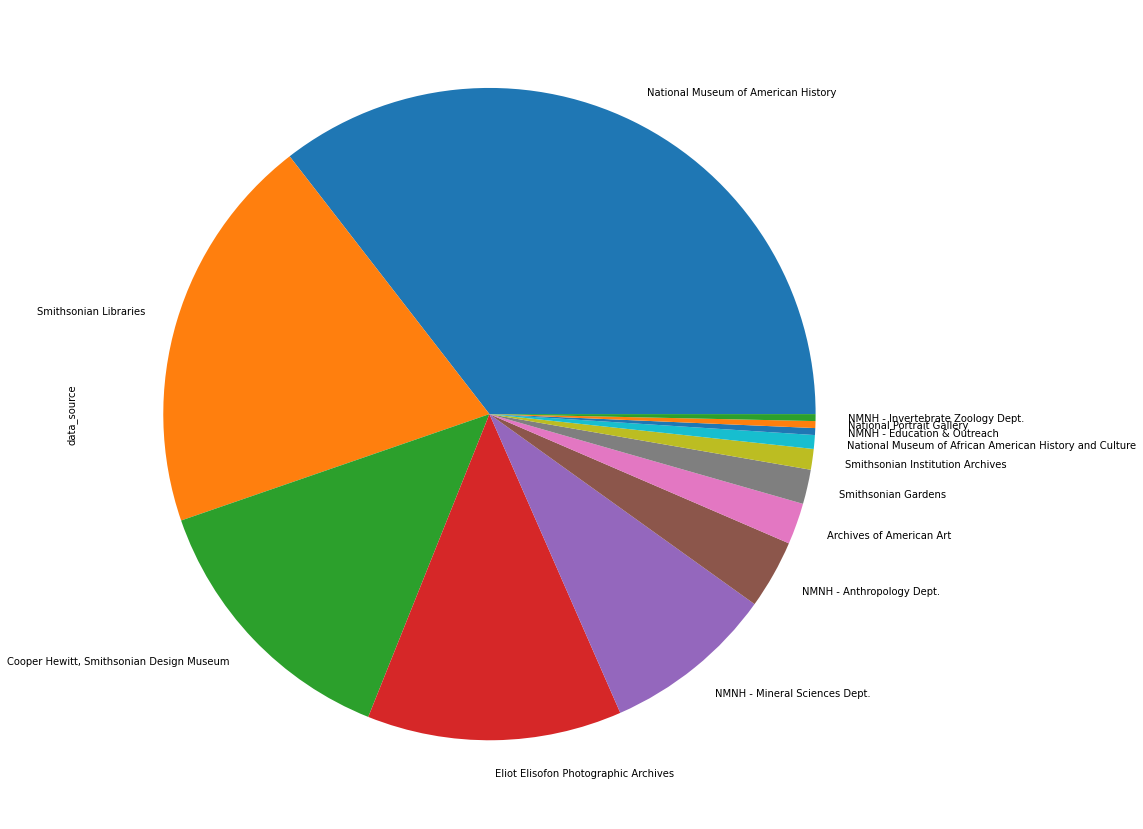

In [43]:
df['data_source'].explode().value_counts().plot.pie(figsize=(25,15))

#### Types of Objects

In [33]:
smithsonian_inventory = df.assign(object_type=df.object_type.str.split(",")).explode('object_type')

In [34]:
smithsonian_inventory['object_type'].explode().value_counts()

Archival materials      46
 Photographs            39
Bottles                 34
Exhibitions (events)    33
                        26
                        ..
 Metalwork               1
 Earrings                1
 Altar Screen            1
Coffeepots               1
Vases                    1
Name: object_type, Length: 119, dtype: int64

<AxesSubplot:>

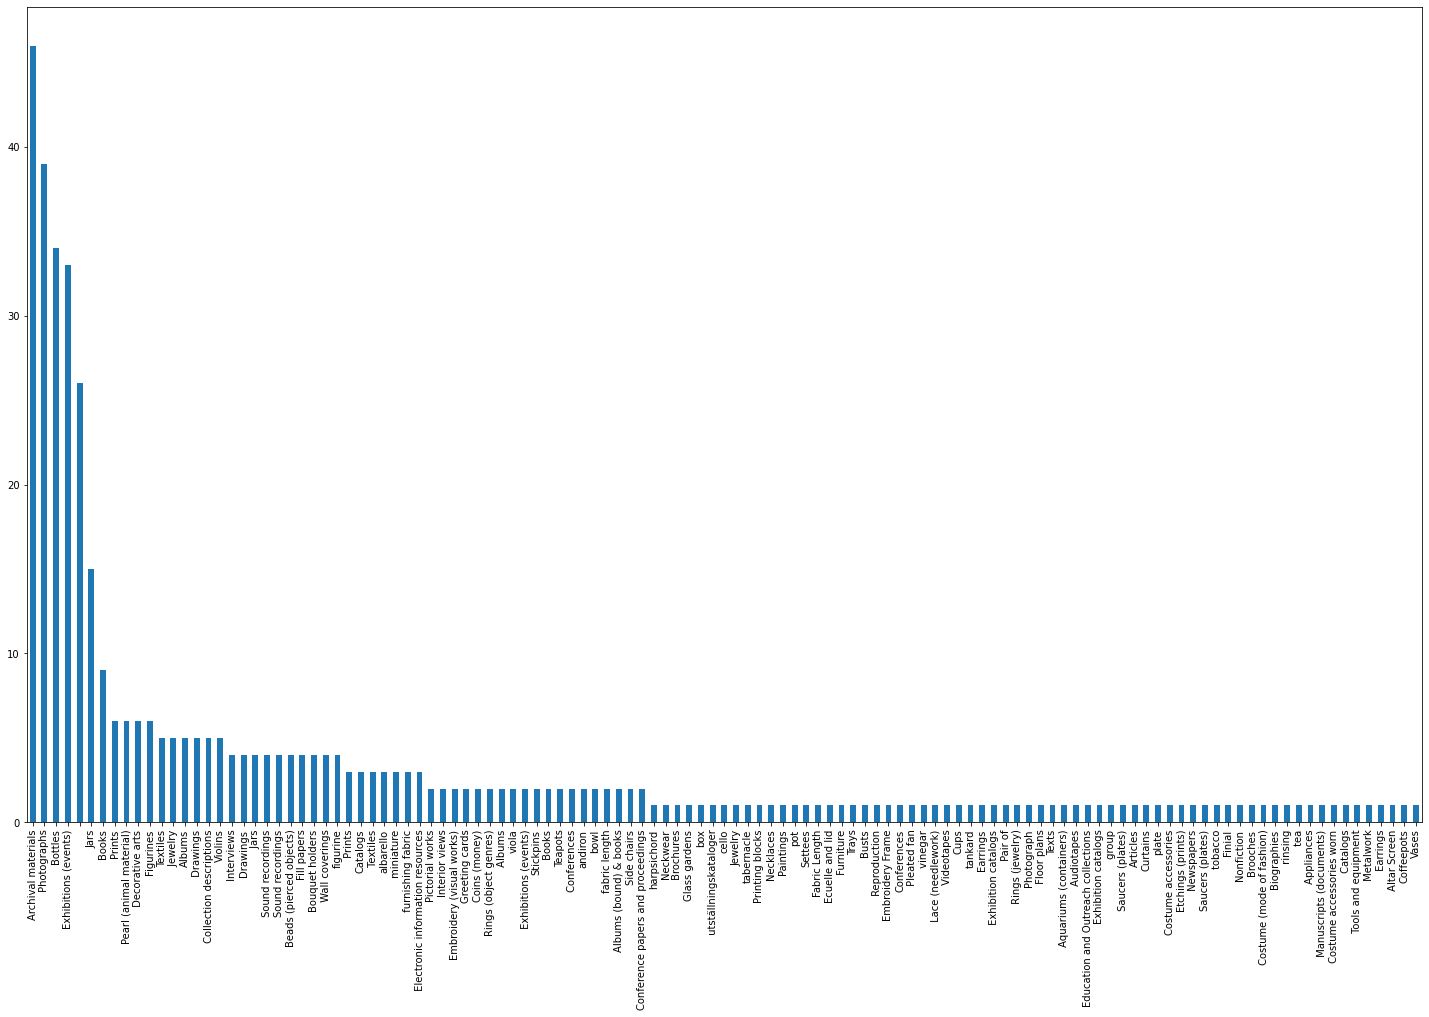

In [42]:
smithsonian_inventory['object_type'].explode().value_counts().plot.bar(figsize=(25,15))